<a href="https://colab.research.google.com/github/Nanasei878/Apple-identification-and-classification-/blob/main/CV_la_pomme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
my_data_dir = '/content/gdrive/MyDrive/Fruitdata'

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
from google.colab.patches import cv2_imshow
# Technically not necessary in newest versions of jupyter
%matplotlib inline
sns.set()

In [4]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['test', 'train']

In [5]:
#Setting the test and train data paths
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [6]:
#Checking all Classes in the train data 
os.listdir(train_path)

['Apple Red Yellow 2',
 'Apple Red Yellow 1',
 'Apple Red Delicious',
 'Apple Red 3',
 'Apple Red 2',
 'Apple Golden 2',
 'Apple Pink Lady',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Golden 1',
 'Apple Red 1',
 'Apple Braeburn',
 'Apple Crimson Snow']

In [7]:
#Checking all Classes in the test data 
os.listdir(test_path)

['Apple Red Yellow 2',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red 1',
 'Apple Red 3',
 'Apple Red 2',
 'Apple Granny Smith',
 'Apple Golden 2',
 'Apple Crimson Snow',
 'Apple Pink Lady',
 'Apple Braeburn',
 'Apple Golden 3',
 'Apple Golden 1']

In [8]:
#Retrieving and viewing one image from the train data
os.listdir(train_path+'/Apple Red Yellow 1')[0]

'246_100.jpg'

In [9]:
apple_1 = train_path+'/Apple Red Yellow 1'+ '/246_100.jpg'

In [10]:
fruit1 = imread(apple_1)

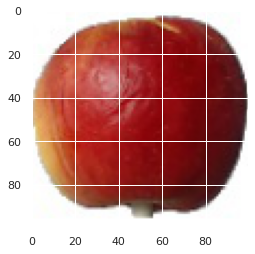

In [12]:
plt.imshow(fruit1)

In [13]:
fruit1.shape

(100, 100, 3)

In [14]:
#Order the classes in ascending or and retrieve the image data accordingly
classes = ['Apple Red Yellow 2',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red 1',
 'Apple Red 3',
 'Apple Red 2',
 'Apple Granny Smith',
 'Apple Golden 2',
 'Apple Crimson Snow',
 'Apple Pink Lady',
 'Apple Braeburn',
 'Apple Golden 3',
 'Apple Golden 1']

classes = sorted(classes)

In [15]:
classes

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2']

In [17]:
#Retrieving the image data from the directories
all_arrays=[]
img_size=100

for i in classes:
    path=os.path.join(train_path,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        #img_array=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        #img_array=cv2.resize(img_array,(img_size,img_size))
        all_arrays.append([img_array,class_num])
    

all_arrays2=[]
#img_size=100

for i in classes:
    path=os.path.join(test_path,i)
    class_num2=classes.index(i)
    for img in os.listdir(path):
        #img_array2=cv2.imread(os.path.join(path,img),
        #                     cv2.IMREAD_GRAYSCALE)
        img_array2=cv2.imread(os.path.join(path,img))
        img_array2=cv2.cvtColor(img_array2, cv2.COLOR_BGR2RGB)
        #img_array2=cv2.resize(img_array2,(img_size,img_size))
        all_arrays2.append([img_array2,class_num2])


In [21]:
#Shuffling the data up, to aid avoid overfitting
import random
random.shuffle(all_arrays)

X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train) #arraying

import random
random.shuffle(all_arrays2)

X_test=[]
Y_test=[]
for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test) #arraying


In [22]:
#normalization and reshaping
X_train=X_train.reshape(-1,img_size,img_size,3)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,3)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (6404, 100, 100, 3)
shape of X_test=   (2134, 100, 100, 3)


In [23]:
#One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [ ]:
Y_train.shape, Y_test.shape

((6404, 13), (2134, 13))

In [ ]:
X_train.shape, X_test.shape

((6404, 100, 100, 3), (2134, 100, 100, 3))

In [ ]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.3,random_state=42)

**Building the Convolutional Neural Network Model to Classify the Apples according to the 13 classes**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(100,100,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.35))


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer is multiclass so categorical_crossentropy is used

model.add(Dense(13, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        3

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
image_shape = (100,100,3)
batch_size = 16

In [ ]:
#Augmenting the data, this helps control overfitting
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               #rescale=1/255, Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )
image_gen.fit(x_train)

In [ ]:
history=model.fit_generator(image_gen.flow(x_train,y_train,batch_size=batch_size),epochs=20,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0] //batch_size,
                            callbacks=[early_stop]
                           )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
280/280 [==============================] - 89s 319ms/step - loss: 0.4879 - accuracy: 0.8318 - val_loss: 0.1167 - val_accuracy: 0.9807
Epoch 2/20
280/280 [==============================] - 89s 319ms/step - loss: 0.3818 - accuracy: 0.8708 - val_loss: 0.1134 - val_accuracy: 0.9875
Epoch 3/20
280/280 [==============================] - 90s 321ms/step - loss: 0.3485 - accuracy: 0.8793 - val_loss: 0.0616 - val_accuracy: 0.9823
Epoch 4/20
280/280 [==============================] - 91s 324ms/step - loss: 0.4348 - accuracy: 0.8491 - val_loss: 0.0634 - val_accuracy: 0.9901
Epoch 5/20
280/280 [==============================] - 90s 320ms/step - loss: 0.3278 - accuracy: 0.8858 - val_loss: 0.0960 - val_accuracy: 0.9683


In [ ]:
losses = pd.DataFrame(model.history.history)

<Figure size 720x576 with 0 Axes>

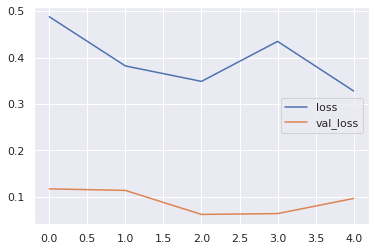

In [ ]:
plt.figure(figsize=(10,8))
losses[['loss','val_loss']].plot()
plt.savefig('pomme_losses')

The model recorded an impressive validation loss of almost 0.1

<Figure size 720x576 with 0 Axes>

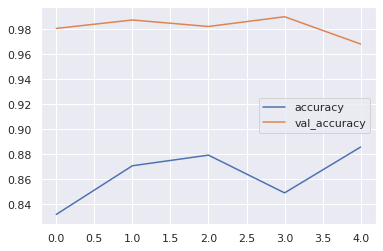

In [ ]:
plt.figure(figsize=(10,8))
losses[['accuracy','val_accuracy']].plot()
plt.savefig('pomme_accuracy')

The model had a high accuracy even though the final epoch did not record the highest accuracy.

# Predicting on an unseen data and Evaluation matrices

In [ ]:
y_true=np.argmax(y_val,axis=1)



In [ ]:
y_pred = np.argmax(model.predict(x_val), axis=-1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       146
           1       0.99      1.00      0.99       132
           2       0.96      0.99      0.97       148
           3       0.99      0.99      0.99       166
           4       0.99      0.65      0.79       138
           5       0.74      1.00      0.85       139
           6       1.00      0.99      0.99       150
           7       1.00      1.00      1.00       145
           8       0.99      1.00      0.99       158
           9       1.00      1.00      1.00       105
          10       1.00      1.00      1.00       149
          11       1.00      0.96      0.98       144
          12       1.00      1.00      1.00       202

    accuracy                           0.97      1922
   macro avg       0.97      0.97      0.97      1922
weighted avg       0.97      0.97      0.97      1922



This model has a precision of 97% thus of all positive predictions, 97% are accurate. It also has a recall of 97% meaning of all predictions, 97% of positive predictions were correct. 97% F1-score implies that the harmornic mean of precision and recall is 97% that confirms the superb precision and recall of the model.

As much as this model is great all round, in this case high precison is the most sufficient. This is because with this model, we intend getting more true positives, thus getting positive preditions right at a high rate. 

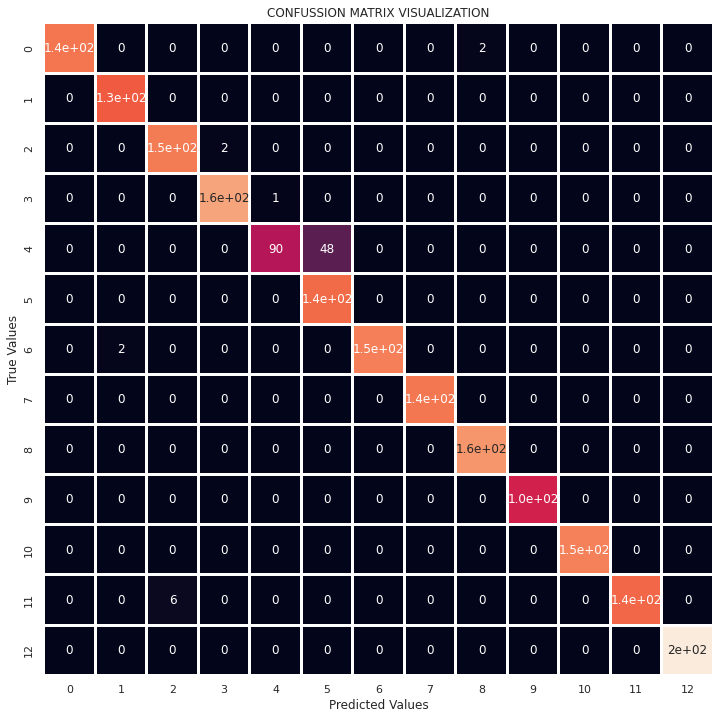

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_true,y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.savefig('confmatrixpomme')
plt.show()

**Making predictions with the model**

In [ ]:
from tensorflow.keras.preprocessing import image

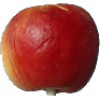

In [ ]:
my_image = image.load_img(apple_1,target_size=image_shape)
my_image

In [ ]:
type(my_image)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
my_image = image.img_to_array(my_image)

In [ ]:
type(my_image)

numpy.ndarray

In [ ]:
my_image.shape 

(100, 100, 3)

In [ ]:
my_image = np.expand_dims(my_image, axis=0)
my_image.shape

(1, 100, 100, 3)

In [ ]:
#Predicting he class of the image (The model predicted corect)
np.argmax(model.predict(my_image))

**Saving and Loading the model**

In [ ]:
model.save('la_pomme_cnn.h5')

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
modelx = load_model('la_pomme_cnn.h5')